# Introducción
SQL (Structured Query Language) es el lenguaje de programación utilizado en  Bases de Datos y un herramienta muy importante para los científicos de datos. Durante este curso se utilizará BigQuery, un servicio web que nos permite aplicar SQL a grandes datasets, con el fin de aprender las nociones básicas de este lenguaje.

Primero, aprendemos a examinar los datasets de BigQuery, luego continuaremos profundizando las habilidades asociadas a SQL.

## Nociones básicas BigQuery
- **from google.cloud import bigquery:** librería Python
- **client = bigquery.Client()**: Objeto con un rol central para el acceso a información de los datasets


En BigQuery, los datasets son contenidos en **Proyectos**. Para acceder, entonces, a un dataset, deberemos:
- Construir una referencia al dataset con el método **client.dataset(ds_name, project=p_name)**
- Luego, obtener el dataset en cuestión mediante **client.get_dataset(ds_ref)**

Cada **dataset**, a su vez, es una **colección de Tablas**:
- **client.list_tables(dataset):** obtener todas las tablas
- **table.table_id:** identificador de cada tabla

De manera análoga a como obteniamos un dataset del proyecto, podremos *fetchear* una tabla del dataset:
- **table_ref = dataset_ref.table(t_name):**
- **table = client.get_table(table_ref):**
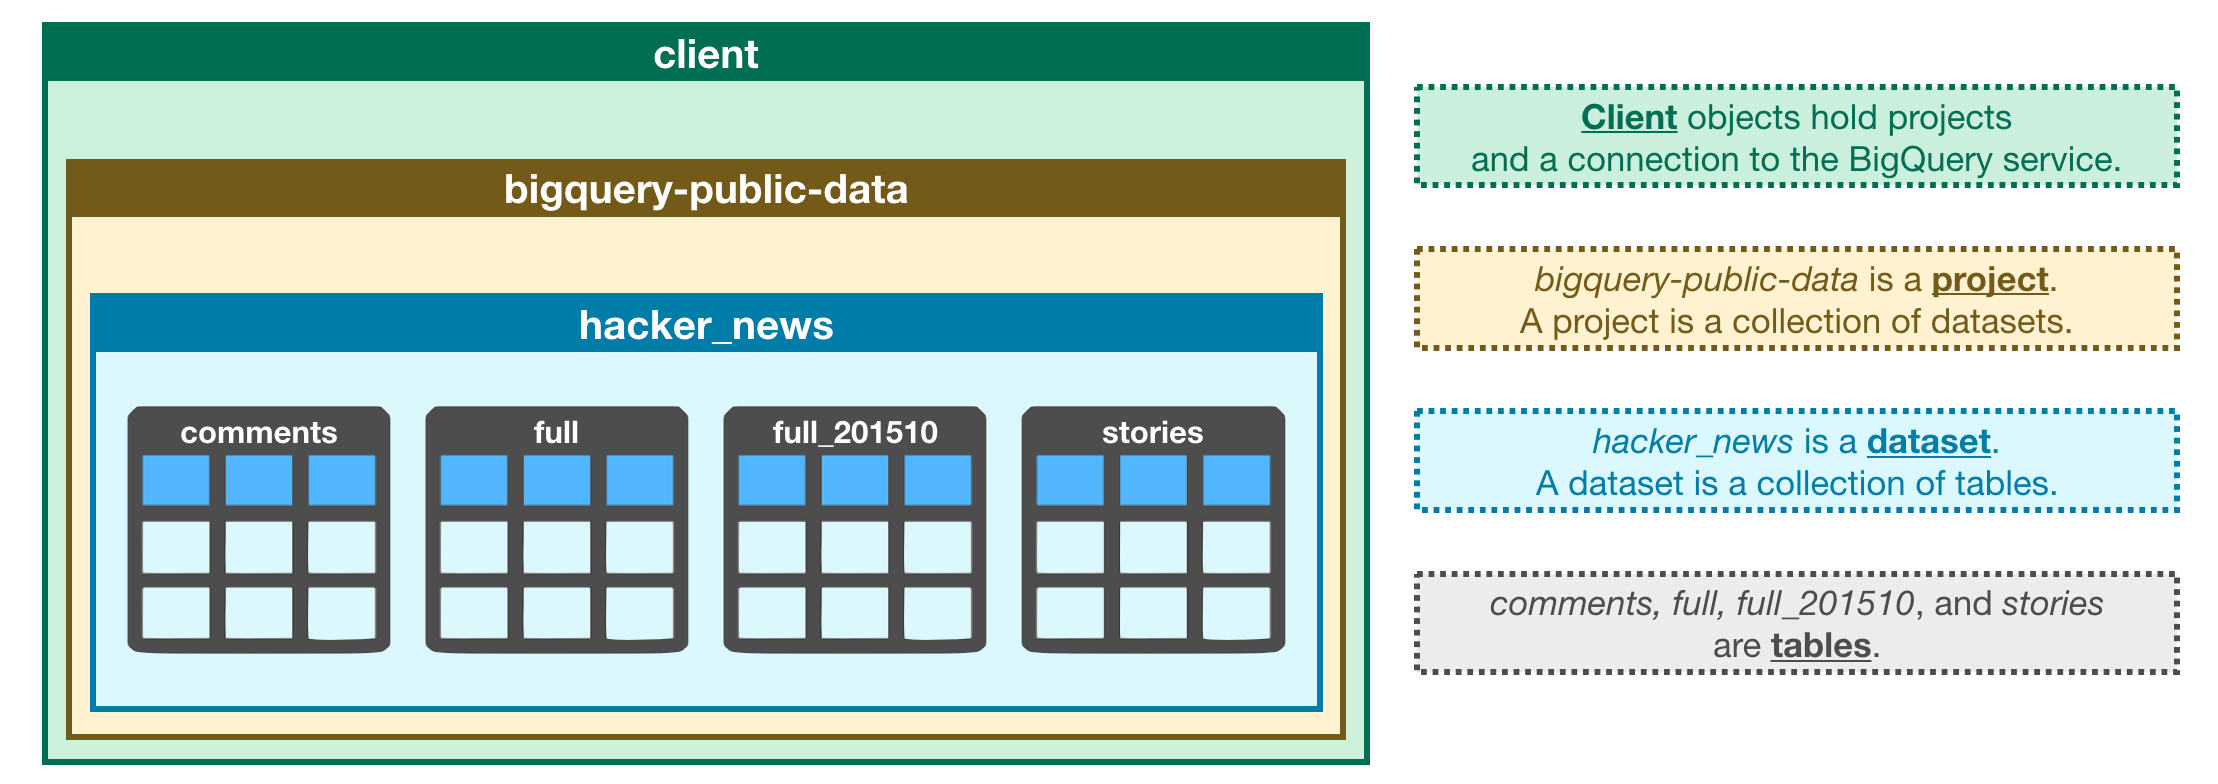

## Table Schema
Esto es la estrucutra de una tabla, nos describe la información contenida en cada columna.

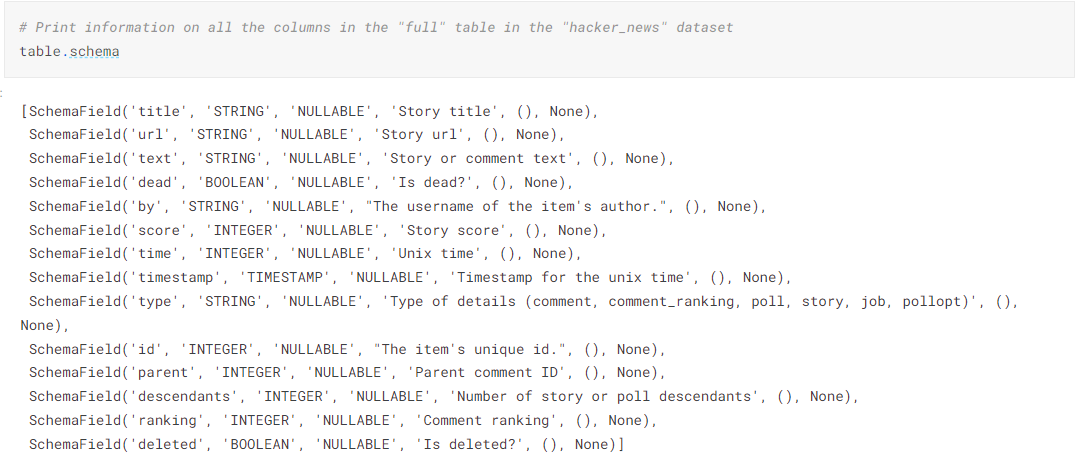

**NOTA:** en ocasiones el *Schema* puede estar desactualizado, por tanto mostrar información que no se corresponde con la realidad. No obstante, podremos verificarlo visualizando las filas de la tabla, mediante el comando **client.list_rows(...)**. El mismo es un *RowIterator*, debe ser convertido a *DataFrame* mediante **to_dataframe()**.
- **client.list_rows(table, max_results=5).to_dataframe()**
- **client.list_rows(table, max_results=5, selected_fields=table.schema[:3]).to_dataframe()**, selecciona deterinados campos deseados.



## Aplicación primeros conceptos BigQuery
### Configuración librería
Para poder utilizar BigQuery, primero deberemos configurarlo por medio de la plataforma de Google Cloud. Nos guiaremos para ello con el siguiente [Bigquery + Python - Tutorial](https://www.youtube.com/watch?v=iolQX4XJN2A).

Los pasos básicos son:
1. Crear proyecto
2. Crear cuenta de usuario
    1. Importante, rol (Bigquery -> Bigquery User)
    2. Importante, email en "grant access"
3. Crear Credenciales (archivo Json)
4. Configurar la variable de entorno: GOOGLE_APPLICATION_CREDENTIALS. Se crea archivo .bashrc en Users/Yo (es el archivo que carga el bash al iniciar) y en el se setea dicha variable, como se muestra en el video

Otras referencias:
- [Documentación oficial Google Cloud Bigquery](https://cloud.google.com/bigquery/docs/reference/libraries#windows)
- [Tutorial Google Cloud + Python](https://medium.com/daily-python/python-script-to-edit-google-sheets-daily-python-7-aadce27846c0)

**IMPORTANTE:** Tenía dudas sobre cómo queda el acceso a los servicios de esta API, osea desde qué proyectos puedo acceder al mismo, pero por lo que veo hasta ahora, como que voy a poder acceder desde cualquiera, ya que lo unico que hice en mi compu fue configurar las credenciales y quedaron disponibles para todos mis archivos aparentemente.

In [14]:
from google.cloud import bigquery

client = bigquery.Client()

# cargo el dataset a utilizar
dataset_ref = client.dataset('chicago_crime', project='bigquery-public-data')
dataset = client.get_dataset(dataset_ref)

# tablas dentro del dataset
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)


crime


In [22]:
# tabla a utilizar, 'crime'
crime_table_ref = dataset_ref.table('crime')
crime_table = client.get_table(crime_table_ref)

# inspecciono las primeras filas de la tabla
client.list_rows(crime_table, max_results=10).to_dataframe()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10249135,HY436444,2015-09-23 05:00:00+00:00,089XX S GREENWOOD AVE,0580,STALKING,SIMPLE,STREET,False,True,...,8,47,08A,1185108.0,1845998.0,2015,2018-02-10 03:50:01+00:00,41.732569,-87.597452,"(41.732568983, -87.597451572)"
1,10256524,HY444083,2015-09-30 10:55:00+00:00,054XX N OVERHILL AVE,2028,NARCOTICS,POSS: SYNTHETIC DRUGS,SIDEWALK,True,False,...,41,10,18,1124004.0,1935080.0,2015,2018-02-10 03:50:01+00:00,41.978240,-87.819354,"(41.978240459, -87.819353706)"
2,10262823,HY450383,2015-10-04 12:23:00+00:00,002XX W PERSHING RD,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,GAS STATION,False,False,...,3,37,11,1175195.0,1879099.0,2015,2018-02-10 03:50:01+00:00,41.823629,-87.632779,"(41.823628586, -87.632779182)"
3,10269796,HY457537,2015-10-11 04:10:00+00:00,099XX S AVENUE L,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,GOVERNMENT BUILDING/PROPERTY,True,False,...,10,52,26,1201811.0,1839421.0,2015,2018-02-10 03:50:01+00:00,41.714113,-87.536485,"(41.71411303, -87.536485442)"
4,10269907,HY457605,2015-10-11 06:25:00+00:00,038XX W 55TH ST,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,23,62,03,1151892.0,1867858.0,2015,2018-02-10 03:50:01+00:00,41.793271,-87.718565,"(41.793271281, -87.718564992)"
5,10292735,HY480552,2015-10-29 03:48:00+00:00,135XX S AVENUE O,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,True,False,...,10,55,26,1201081.0,1815536.0,2015,2018-02-10 03:50:01+00:00,41.648589,-87.539964,"(41.648588776, -87.539964437)"
6,10178289,HY366706,2015-08-03 12:33:00+00:00,130XX S MANISTEE AVE,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,False,...,10,55,26,1196765.0,1819173.0,2015,2018-02-10 03:50:01+00:00,41.658677,-87.555635,"(41.658677053, -87.555634907)"
7,10180184,HY367266,2015-07-29 12:00:00+00:00,038XX S WESTERN AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,ATM (AUTOMATIC TELLER MACHINE),False,False,...,12,59,11,1160993.0,1878865.0,2015,2018-02-10 03:50:01+00:00,41.823292,-87.684888,"(41.823292416, -87.684887737)"
8,10331931,HY521381,2015-11-29 09:00:00+00:00,134XX S BRANDON AVE,0498,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET S...,RESIDENCE,False,True,...,10,55,04B,1199443.0,1816469.0,2015,2018-02-10 03:50:01+00:00,41.651190,-87.545926,"(41.651190246, -87.545926036)"
9,10341932,HY532703,2015-12-03 08:00:00+00:00,111XX S TRUMBULL AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,...,19,74,11,1155347.0,1830516.0,2015,2018-02-10 03:50:01+00:00,41.690730,-87.706893,"(41.690730083, -87.706892506)"
